In [1]:
#pip install selenium
"dirunning 04 jan 2023 "

'dirunning 04 jan 2023 '

In [142]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from decimal import Decimal

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service 

In [116]:
data = []
count_page = 100

# Get Count page from count car
url = "https://www.exchange-rates.org/history/IDR/USD/T" 
item_content = requests.get(url)
soup = BeautifulSoup(item_content.content, 'html.parser')
span_count_rate = soup.find('table' , {"table table-striped table-hover table-hover-solid-row table-simple history-data"})

print(span_count_rate)


<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
<tbody>
<tr><td>1/6/2023</td><td>Friday</td><td><a href="/Rate/USD/IDR/1-6-2023">15,607.20000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-6-2023">USD IDR rate for 1/6/2023</a></td></tr><tr><td>1/5/2023</td><td>Thursday</td><td><a href="/Rate/USD/IDR/1-5-2023">15,635.20000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-5-2023">USD IDR rate for 1/5/2023</a></td></tr><tr><td>1/4/2023</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/1-4-2023">15,581.95000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-4-2023">USD IDR rate for 1/4/2023</a></td></tr><tr><td>1/3/2023</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/1-3-2023">15,594.30000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/1-3-2023">USD IDR rate for 1/3/2023</a></td></tr><tr><td>1/2/2023</td><td>Monday</td><td><a href="/Rate/USD

In [143]:


data = []
dataFrame = []
table = span_count_rate
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

for val in data :
    dataFrame.append({
        'Date' : val[0],
        'Day' : val[1],
        'Rate' : Decimal(val[2].replace('IDR', '').replace(",","")),
        'Remark' : val[3]
    })
dfCurrency = pd.DataFrame(dataFrame)

In [145]:
print(dfCurrency)

          Date        Day         Rate                      Remark
0     1/6/2023     Friday  15607.20000   USD IDR rate for 1/6/2023
1     1/5/2023   Thursday  15635.20000   USD IDR rate for 1/5/2023
2     1/4/2023  Wednesday  15581.95000   USD IDR rate for 1/4/2023
3     1/3/2023    Tuesday  15594.30000   USD IDR rate for 1/3/2023
4     1/2/2023     Monday  15554.00000   USD IDR rate for 1/2/2023
..         ...        ...          ...                         ...
125  7/15/2022     Friday  14996.35000  USD IDR rate for 7/15/2022
126  7/14/2022   Thursday  15045.60000  USD IDR rate for 7/14/2022
127  7/13/2022  Wednesday  15030.45000  USD IDR rate for 7/13/2022
128  7/12/2022    Tuesday  14984.00000  USD IDR rate for 7/12/2022
129  7/11/2022     Monday  15010.52059  USD IDR rate for 7/11/2022

[130 rows x 4 columns]


In [146]:
dfCurrency.to_csv('currency.csv', sep=';', index=False, header=True)
print(dfCurrency)

          Date        Day         Rate                      Remark
0     1/6/2023     Friday  15607.20000   USD IDR rate for 1/6/2023
1     1/5/2023   Thursday  15635.20000   USD IDR rate for 1/5/2023
2     1/4/2023  Wednesday  15581.95000   USD IDR rate for 1/4/2023
3     1/3/2023    Tuesday  15594.30000   USD IDR rate for 1/3/2023
4     1/2/2023     Monday  15554.00000   USD IDR rate for 1/2/2023
..         ...        ...          ...                         ...
125  7/15/2022     Friday  14996.35000  USD IDR rate for 7/15/2022
126  7/14/2022   Thursday  15045.60000  USD IDR rate for 7/14/2022
127  7/13/2022  Wednesday  15030.45000  USD IDR rate for 7/13/2022
128  7/12/2022    Tuesday  14984.00000  USD IDR rate for 7/12/2022
129  7/11/2022     Monday  15010.52059  USD IDR rate for 7/11/2022

[130 rows x 4 columns]


In [147]:
df = pd.read_csv("currency.csv", sep = ";")

In [148]:
df.head()

,Date,Day,Rate,Remark
0,1/6/2023,Friday,15607.20,USD IDR rate for 1/6/2023
1,1/5/2023,Thursday,15635.20,USD IDR rate for 1/5/2023
2,1/4/2023,Wednesday,15581.95,USD IDR rate for 1/4/2023
3,1/3/2023,Tuesday,15594.30,USD IDR rate for 1/3/2023
4,1/2/2023,Monday,15554.00,USD IDR rate for 1/2/2023


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    130 non-null    object 
 1   Day     130 non-null    object 
 2   Rate    130 non-null    float64
 3   Remark  130 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.2+ KB


In [159]:
df_1 = df.copy() 

In [160]:
df_1['Date'] = df_1['Date'].astype('datetime64')
df_1['Day'] = df_1['Day'].astype('category')

In [161]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    130 non-null    datetime64[ns]
 1   Day     130 non-null    category      
 2   Rate    130 non-null    float64       
 3   Remark  130 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 3.5+ KB


In [166]:
crosstab_frekuensi = pd.crosstab(
    index=df_1['Rate'],  
    columns=df_1['Day'] 
)
crosstab_frekuensi

Day,Friday,Monday,Thursday,Tuesday,Wednesday
Rate,,,,,
14661.07616,1,0,0,0,0
14732.30000,0,0,1,0,0
14749.60000,0,0,0,1,0
14766.50000,0,0,0,0,1
14770.20000,0,0,0,0,1
...,...,...,...,...,...
15733.50000,0,0,0,1,0
15740.80000,0,1,0,0,0
15742.83672,0,1,0,0,0


In [176]:
df2 = df_1.pivot(index = 'Rate', columns = 'Day')['Date'].fillna(0)
df2

Day,Friday,Monday,Thursday,Tuesday,Wednesday
Rate,,,,,
14661.07616,2022-08-12 00:00:00,0,0,0,0
14732.30000,0,0,2022-08-11 00:00:00,0,0
14749.60000,0,0,0,2022-08-16 00:00:00,0
14766.50000,0,0,0,0,2022-08-10 00:00:00
14770.20000,0,0,0,0,2022-08-17 00:00:00
...,...,...,...,...,...
15733.50000,0,0,0,2022-11-29 00:00:00,0
15740.80000,0,2022-11-21 00:00:00,0,0,0
15742.83672,0,2022-11-28 00:00:00,0,0,0


In [178]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

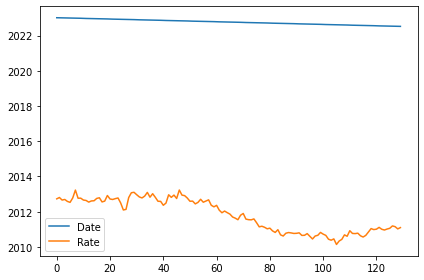

In [204]:
df_1.plot()
plt.tight_layout() 

Text(0.5, 1.0, 'Rate')

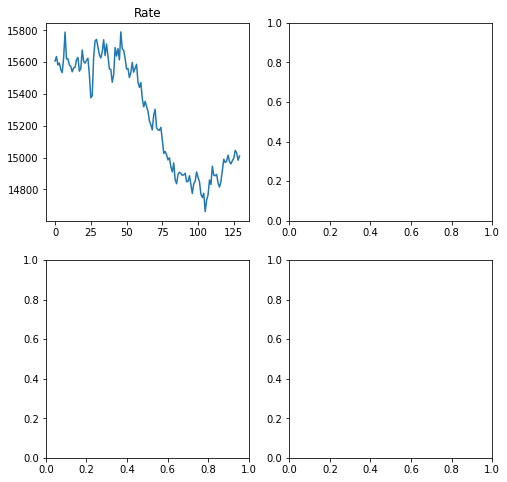

In [205]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
df_1['Rate'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Rate')